# Tomato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

##### Import all the Dependencies

In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import splitfolders

##### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

In [ ]:
input_folder = r'C:\Users\Admin\Computer vision\CNN_project\Tomato_disease_classification\data'
splitfolders.ratio(input_folder, output= 'dataset',
                  seed = 42, ratio = (0.8,0.1,0.1),
                  group_prefix = None)

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 10,
        horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size =(IMAGE_SIZE, IMAGE_SIZE),
        batch_size = 32,
        class_mode = "sparse"
)

Found 12804 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
# To see a particular image
count = 0 
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    #print(label_batch[0])
    break
    count+=1
    if  count>2:
        break

[[[0.652501   0.60936373 0.6015206 ]
  [0.65564185 0.6125046  0.60466146]
  [0.6587827  0.61564547 0.60780233]
  ...
  [0.60969365 0.5547917  0.5508701 ]
  [0.55077875 0.4958768  0.49195522]
  [0.6471206  0.59221864 0.58829707]]

 [[0.63314635 0.59000903 0.5821659 ]
  [0.63628715 0.5931499  0.58530676]
  [0.639428   0.59629077 0.58844763]
  ...
  [0.599643   0.54474103 0.54081947]
  [0.5413562  0.48645422 0.48253265]
  [0.67036295 0.61546093 0.61153936]]

 [[0.6911477  0.64801043 0.6401673 ]
  [0.6804688  0.63733155 0.6294884 ]
  [0.6697899  0.62665266 0.6188095 ]
  ...
  [0.58999765 0.5350957  0.5311741 ]
  [0.5503807  0.49547875 0.49155718]
  [0.6793119  0.6244099  0.62048835]]

 ...

 [[0.7633771  0.73984766 0.73984766]
  [0.74730724 0.72377783 0.72377783]
  [0.76412964 0.7406002  0.7406002 ]
  ...
  [0.5254902  0.4784314  0.4784314 ]
  [0.5254902  0.4784314  0.4784314 ]
  [0.5254902  0.4784314  0.4784314 ]]

 [[0.7564672  0.7329378  0.7329378 ]
  [0.7479354  0.724406   0.724406  ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 10,
        horizontal_flip = True)

validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = 32,
        class_mode = "sparse"
)

Found 1597 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 10,
        horizontal_flip = True)


test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = 32,
        class_mode = "sparse"
)

Found 1610 images belonging to 10 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.44662094 0.38779742 0.4152484 ]
  [0.48798457 0.42916104 0.45661202]
  [0.48321417 0.42439064 0.45184162]
  ...
  [0.42726108 0.3762807  0.4115748 ]
  [0.4269041  0.37592372 0.41121784]
  [0.42654714 0.37556675 0.41086087]]

 [[0.44198033 0.3831568  0.41060778]
  [0.4872706  0.42844707 0.45589805]
  [0.48785478 0.42903125 0.45648223]
  ...
  [0.42370304 0.37272266 0.40801677]
  [0.42406005 0.37307966 0.40837377]
  [0.42441702 0.37343663 0.40873075]]

 [[0.43733975 0.37851623 0.4059672 ]
  [0.48655668 0.42773315 0.45518413]
  [0.49249536 0.43367183 0.4611228 ]
  ...
  [0.42760834 0.37662795 0.41192207]
  [0.4279653  0.37698492 0.41227904]
  [0.42832232 0.37734193 0.41263604]]

 ...

 [[0.6971657  0.6540285  0.66971475]
  [0.69896793 0.6558307  0.67151695]
  [0.7003959  0.6572586  0.6729449 ]
  ...
  [0.624086   0.5927135  0.64369386]
  [0.62961227 0.5982397  0.6492201 ]
  [0.6431373  0.6117647  0.6627451 ]]

 [[0.71316123 0.670024   0.68571025]
  [0.71286196 0.6697247  0.685411  ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    
    layers.Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

#### Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as metric

In [12]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [13]:
12804/32

400.125

In [15]:
1597 //32

49

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch= 400,
    batch_size= 32,
    validation_data= validation_generator,
    validation_steps= 49,
    verbose = 1,
    epochs = 10
)

Epoch 1/10
400/400 [==============================] - 785s 2s/step - loss: 1.4446 - accuracy: 0.4865 - val_loss: 0.8074 - val_accuracy: 0.7105
Epoch 2/10
400/400 [==============================] - 742s 2s/step - loss: 0.7315 - accuracy: 0.7467 - val_loss: 0.5696 - val_accuracy: 0.8093
Epoch 3/10
400/400 [==============================] - 736s 2s/step - loss: 0.5202 - accuracy: 0.8230 - val_loss: 0.4425 - val_accuracy: 0.8399
Epoch 4/10
400/400 [==============================] - 731s 2s/step - loss: 0.4142 - accuracy: 0.8549 - val_loss: 0.3067 - val_accuracy: 0.8960
Epoch 5/10
400/400 [==============================] - 740s 2s/step - loss: 0.3367 - accuracy: 0.8839 - val_loss: 0.3271 - val_accuracy: 0.8967
Epoch 6/10
400/400 [==============================] - 743s 2s/step - loss: 0.3022 - accuracy: 0.8970 - val_loss: 0.2818 - val_accuracy: 0.9024
Epoch 7/10
400/400 [==============================] - 753s 2s/step - loss: 0.2656 - accuracy: 0.9093 - val_loss: 0.3163 - val_accuracy: 0.8884

In [17]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 37s 734ms/step - loss: 0.2385 - accuracy: 0.9130


In [18]:
scores

[0.23847980797290802, 0.9130434989929199]

#### Plotting the Accuracy and Loss Curves

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 400}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

10

In [25]:
history.history['loss']

[1.444586157798767,
 0.7315002083778381,
 0.5202009081840515,
 0.4141751527786255,
 0.3367038369178772,
 0.3021867275238037,
 0.2656426429748535,
 0.24219714105129242,
 0.20236745476722717,
 0.1799057275056839]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

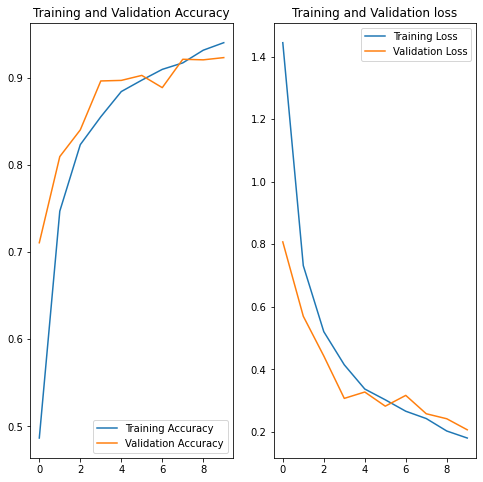

In [35]:
# Plotting
EPOCHS = 10

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

#### Run prediction on a sample image

First image to predict
Actual label : Tomato_healthy
predicted label: Tomato_healthy


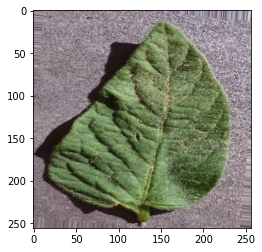

In [33]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[5]
    first_label = int(label_batch[5])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label :" ,class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[5])])
    
    break

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

#### Now run inference on few sample images

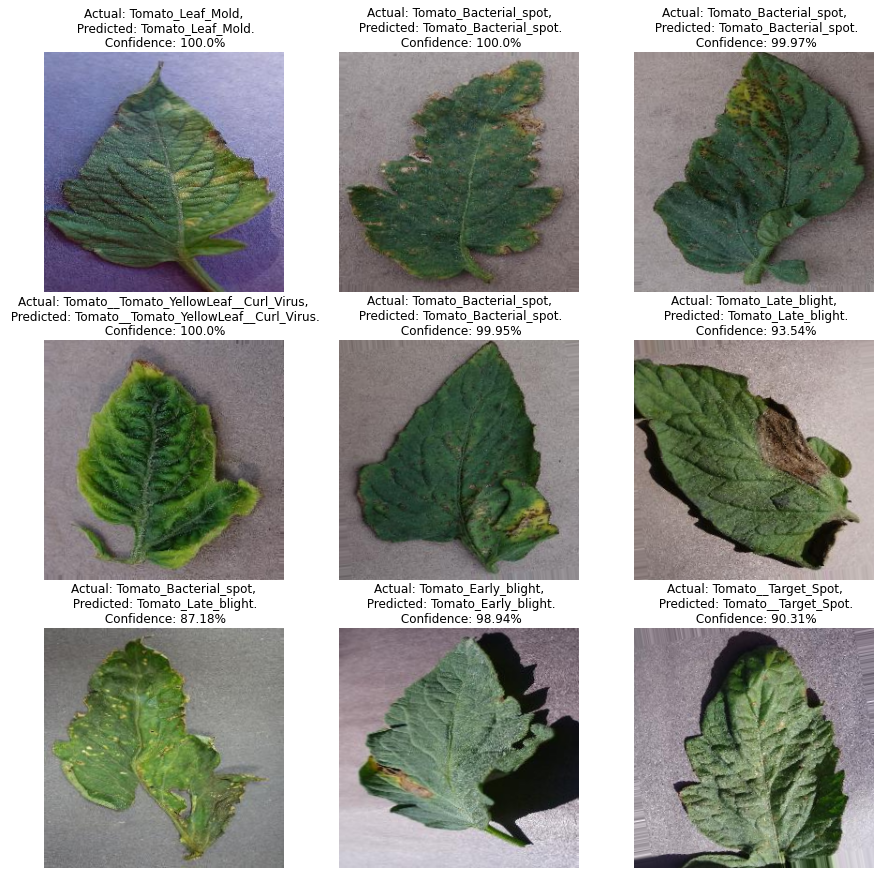

In [37]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        
    break
        
                  

### Saving the Model

Save the model in h5 format so that there is just one file and we can upload that to GCP conveniently.

In [38]:
model.save("../tomatoes.h5")